# Spanish Reviews Sentiment Analysis

This notebook focuses on preparing Spanish restaurant reviews for sentiment analysis by:
1. Filtering Spanish reviews from the dataset
2. Creating sentiment labels based on ratings
3. Analyzing sentiment distribution and characteristics
4. Preparing data for sentiment classification models

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


In [14]:
# Load the reviews dataset
city = "Madrid"
print(f"Loading reviews data for {city}...")
reviews = pd.read_pickle(f"{city}/reviews.pkl")

print(f"Total reviews loaded: {len(reviews):,}")
print(f"Dataset shape: {reviews.shape}")
print(f"Memory usage: {reviews.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Show basic info
print("\nDataset columns:", reviews.columns.tolist())
print("\nFirst few rows:")
reviews.head()

Loading reviews data for Madrid...
Total reviews loaded: 1,347,959
Dataset shape: (1347959, 10)
Memory usage: 1299.43 MB

Dataset columns: ['reviewId', 'userId', 'itemId', 'title', 'text', 'date', 'rating', 'language', 'images', 'url']

First few rows:


,reviewId,userId,itemId,title,text,date,rating,language,images,url
0,881374404,74B2D6F62DB1CEC358822079728F8317,20112202,Cena en familia,"Pedimos una pizza para cenar, mitad barbacoa m...",2023-03-07,50,es,[https://media-cdn.tripadvisor.com/media/photo...,https://www.tripadvisor.com/ShowUserReviews-g1...
1,872226520,1B3559478B9FF8A52A552BA99AC6F00E,20112202,Que asco de restaurante,"Better pizza, mejor ponte a hacer pan que tien...",2022-12-19,10,es,[],https://www.tripadvisor.com/ShowUserReviews-g1...
2,850451467,FE5E99DC6572BB56B2D1D893BC13A392,20112202,"Pizzas distintas, riquísimas","Pizza de rabo de toro, conejo al ajillo,... so...",2022-07-28,50,es,[https://media-cdn.tripadvisor.com/media/photo...,https://www.tripadvisor.com/ShowUserReviews-g1...
3,810574583,9E85C6C3DA1C0498B1EEEE9A3A833A99,20112202,ONE OF THE BEST PIZZAS,"pizza rica y distinta. calidad muy alta, el sa...",2021-09-18,50,es,[],https://www.tripadvisor.com/ShowUserReviews-g1...
4,757187287,5FB02D459F27ECD91CB38AC3CCD92B79,20112202,Muy buenas pizzas. Tienen,Muy buenas pizzas. Tienen de varios tamaños pe...,2020-06-10,50,es,[],https://www.tripadvisor.com/ShowUserReviews-g1...


In [15]:
# Filter Spanish reviews only
print("Filtering Spanish reviews...")
print(f"Language distribution in original dataset:")
print(reviews['language'].value_counts().head(10))

# Filter for Spanish reviews
spanish_reviews = reviews[reviews['language'] == 'es'].copy().reset_index(drop=True)

print(f"\nSpanish reviews: {len(spanish_reviews):,} ({len(spanish_reviews)/len(reviews)*100:.1f}% of total)")
print(f"Filtered dataset shape: {spanish_reviews.shape}")
print(f"Memory usage: {spanish_reviews.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Filtering Spanish reviews...
Language distribution in original dataset:
language
es    964056
en    200628
it     71858
fr     39690
pt     30588
de      9497
nl      8329
ru      7593
ja      2850
zh      2398
Name: count, dtype: int64

Spanish reviews: 964,056 (71.5% of total)
Filtered dataset shape: (964056, 10)
Memory usage: 931.24 MB


Rating distribution in Spanish reviews:
rating
10     86342
20     55870
30    116525
40    263642
50    441677
Name: count, dtype: int64

Percentage distribution:
rating
10     8.96
20     5.80
30    12.09
40    27.35
50    45.81
Name: count, dtype: float64


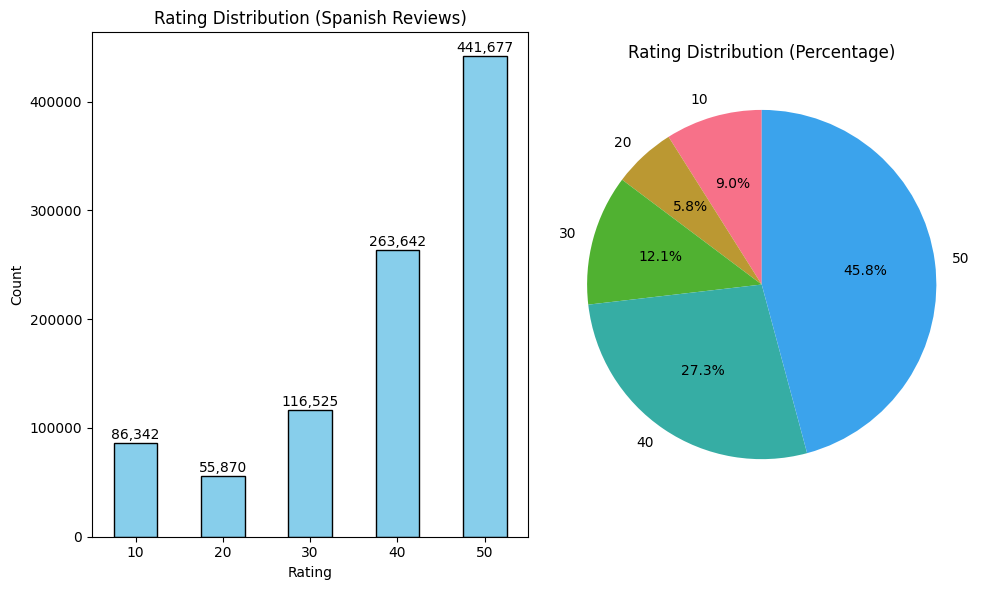

In [16]:
# Analyze rating distribution in Spanish reviews
print("Rating distribution in Spanish reviews:")
rating_counts = spanish_reviews['rating'].value_counts().sort_index()
print(rating_counts)
print("\nPercentage distribution:")
print((rating_counts / len(spanish_reviews) * 100).round(2))

# Visualize rating distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Rating Distribution (Spanish Reviews)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, v in enumerate(rating_counts.values):
    plt.text(i, v + 1000, f'{v:,}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
rating_pct = rating_counts / len(spanish_reviews) * 100
plt.pie(rating_pct.values, labels=rating_pct.index, autopct='%1.1f%%', startangle=90)
plt.title('Rating Distribution (Percentage)')

plt.tight_layout()
plt.show()

In [17]:
# Create sentiment labels based on ratings
def create_sentiment_labels(rating):
    """Convert ratings to sentiment labels
    
    Rating system: 10, 20, 30, 40, 50
    - Negative: 10, 20 (bottom 40%)
    - Neutral: 30 (middle 20%) 
    - Positive: 40, 50 (top 40%)
    """
    if rating <= 20:
        return 'negative'
    elif rating == 30:
        return 'neutral'
    else:  # rating >= 40
        return 'positive'

# Apply sentiment labeling
spanish_reviews['sentiment'] = spanish_reviews['rating'].apply(create_sentiment_labels)

# Show sentiment distribution
print("Sentiment distribution:")
sentiment_counts = spanish_reviews['sentiment'].value_counts()
print(sentiment_counts)
print("\nPercentage distribution:")
sentiment_pct = sentiment_counts / len(spanish_reviews) * 100
print(sentiment_pct.round(2))

print("\nSentiment by rating:")
print(pd.crosstab(spanish_reviews['rating'], spanish_reviews['sentiment']))

Sentiment distribution:
sentiment
positive    705319
negative    142212
neutral     116525
Name: count, dtype: int64

Percentage distribution:
sentiment
positive    73.16
negative    14.75
neutral     12.09
Name: count, dtype: float64

Sentiment by rating:
sentiment  negative  neutral  positive
rating                                
10            86342        0         0
20            55870        0         0
30                0   116525         0
40                0        0    263642
50                0        0    441677


In [18]:
# ============================================================================
# CLASS IMBALANCE ANALYSIS - THESIS FOCUS
# ============================================================================

print("="*80)
print("CLASS IMBALANCE ANALYSIS FOR THESIS RESEARCH")
print("="*80)

# Calculate detailed imbalance metrics
sentiment_counts = spanish_reviews['sentiment'].value_counts()
total_samples = len(spanish_reviews)

# Imbalance ratios and metrics
majority_class = sentiment_counts.index[0]
majority_count = sentiment_counts.iloc[0]
minority_class = sentiment_counts.index[-1]
minority_count = sentiment_counts.iloc[-1]

imbalance_ratio = majority_count / minority_count
imbalance_percentage = (majority_count - minority_count) / total_samples * 100

print(f"\nCLASS DISTRIBUTION SUMMARY:")
print(f"  Total samples: {total_samples:,}")
print(f"  Majority class: {majority_class} ({majority_count:,} samples, {majority_count/total_samples*100:.1f}%)")
print(f"  Minority class: {minority_class} ({minority_count:,} samples, {minority_count/total_samples*100:.1f}%)")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}:1")
print(f"  Imbalance severity: {imbalance_percentage:.1f}% difference")

# Classification of imbalance severity
if imbalance_ratio < 1.5:
    severity = "Minimal"
elif imbalance_ratio < 3:
    severity = "Moderate"
elif imbalance_ratio < 5:
    severity = "High"
else:
    severity = "Extreme"

print(f"  Imbalance severity classification: {severity}")

# Detailed per-class analysis
print(f"\nPER-CLASS DETAILED ANALYSIS:")
for sentiment in sentiment_counts.index:
    count = sentiment_counts[sentiment]
    percentage = count / total_samples * 100
    ratio_to_majority = count / majority_count
    print(f"  {sentiment.upper()}:")
    print(f"    Count: {count:,}")
    print(f"    Percentage: {percentage:.2f}%")
    print(f"    Ratio to majority: {ratio_to_majority:.3f}")
    print(f"    Underrepresentation: {(1 - ratio_to_majority) * 100:.1f}%")

# Calculate all pairwise imbalance ratios
print(f"\nPAIRWISE IMBALANCE RATIOS:")
sentiments = sentiment_counts.index.tolist()
for i, sent1 in enumerate(sentiments):
    for j, sent2 in enumerate(sentiments):
        if i < j:
            ratio = sentiment_counts[sent1] / sentiment_counts[sent2]
            print(f"  {sent1.capitalize()} vs {sent2.capitalize()}: {ratio:.2f}:1")

CLASS IMBALANCE ANALYSIS FOR THESIS RESEARCH

CLASS DISTRIBUTION SUMMARY:
  Total samples: 964,056
  Majority class: positive (705,319 samples, 73.2%)
  Minority class: neutral (116,525 samples, 12.1%)
  Imbalance ratio: 6.05:1
  Imbalance severity: 61.1% difference
  Imbalance severity classification: Extreme

PER-CLASS DETAILED ANALYSIS:
  POSITIVE:
    Count: 705,319
    Percentage: 73.16%
    Ratio to majority: 1.000
    Underrepresentation: 0.0%
  NEGATIVE:
    Count: 142,212
    Percentage: 14.75%
    Ratio to majority: 0.202
    Underrepresentation: 79.8%
  NEUTRAL:
    Count: 116,525
    Percentage: 12.09%
    Ratio to majority: 0.165
    Underrepresentation: 83.5%

PAIRWISE IMBALANCE RATIOS:
  Positive vs Negative: 4.96:1
  Positive vs Neutral: 6.05:1
  Negative vs Neutral: 1.22:1


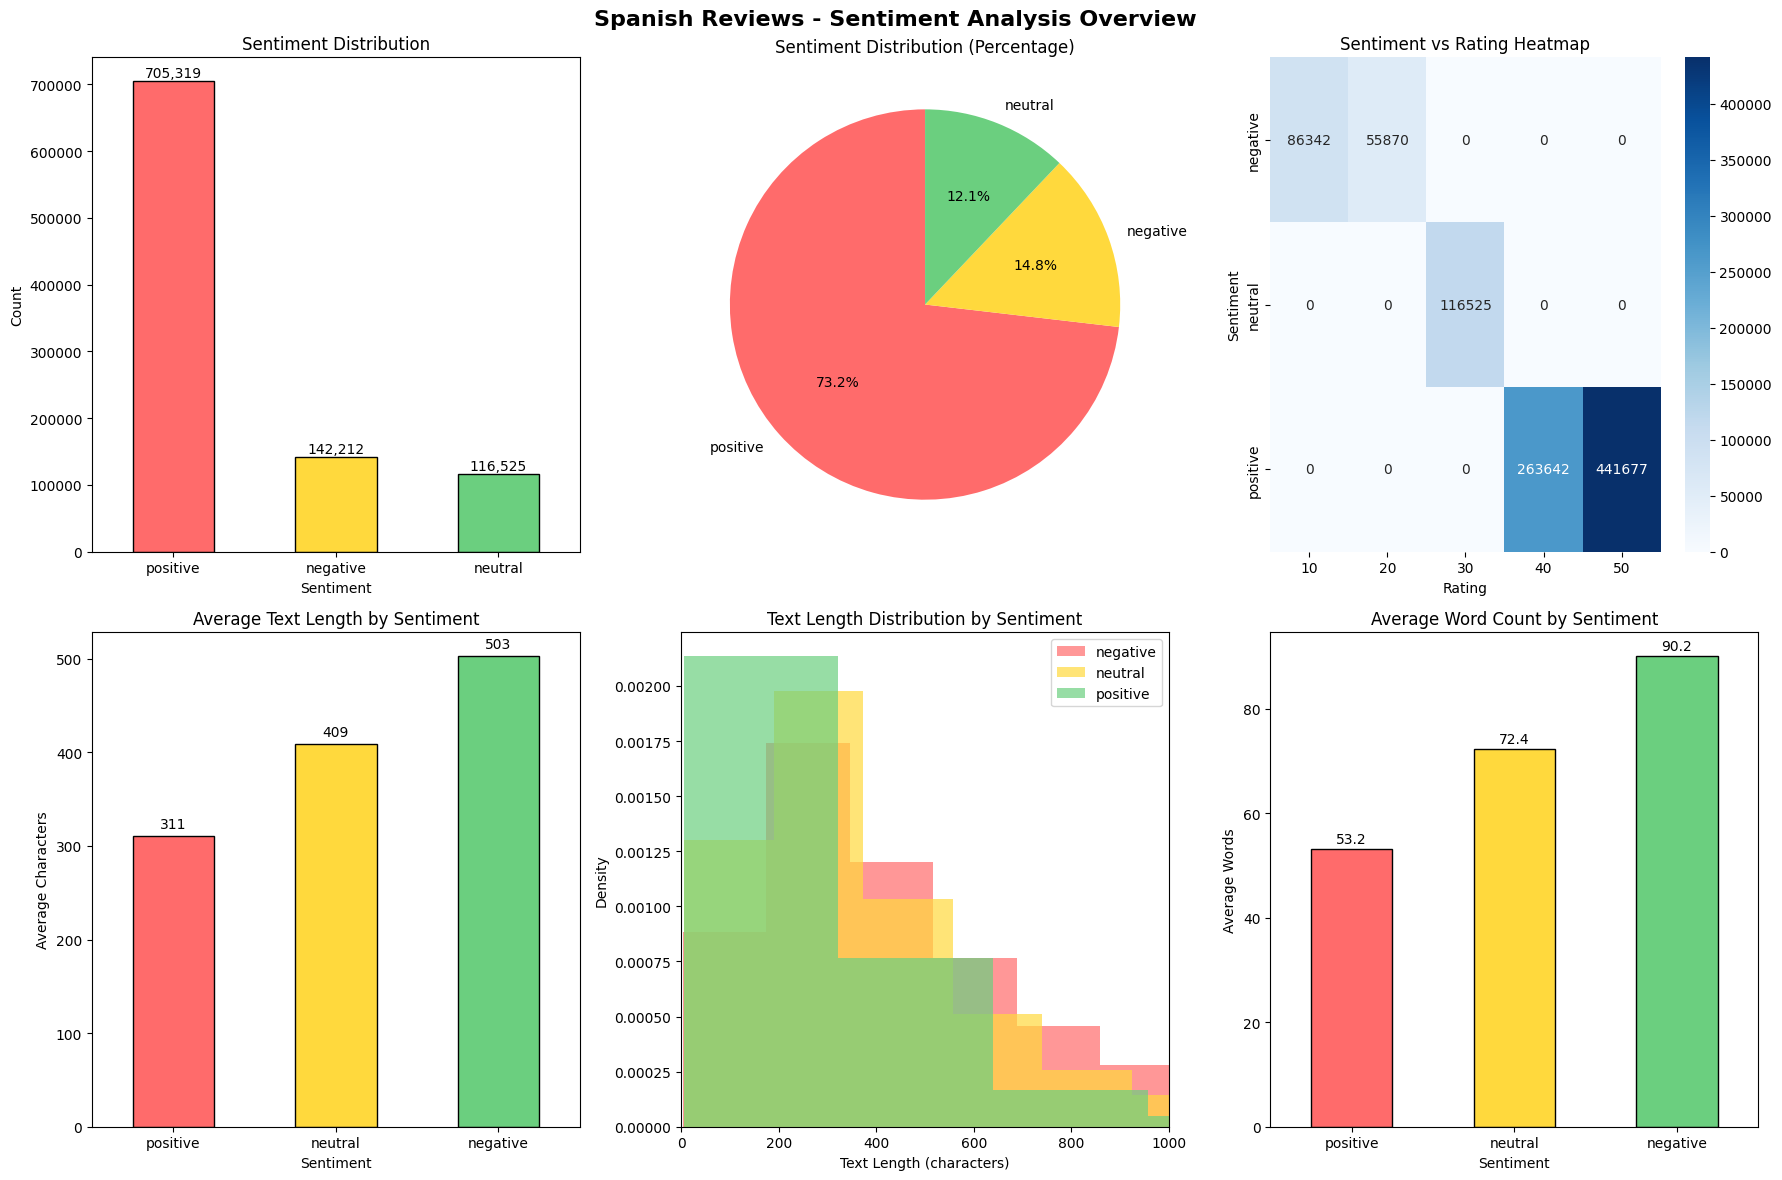

In [19]:
# Comprehensive sentiment visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Spanish Reviews - Sentiment Analysis Overview', fontsize=16, fontweight='bold')

# 1. Sentiment distribution bar chart
sentiment_counts.plot(kind='bar', ax=axes[0, 0], color=['#ff6b6b', '#ffd93d', '#6bcf7f'], edgecolor='black')
axes[0, 0].set_title('Sentiment Distribution')
axes[0, 0].set_xlabel('Sentiment')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)
for i, v in enumerate(sentiment_counts.values):
    axes[0, 0].text(i, v + 1000, f'{v:,}', ha='center', va='bottom')

# 2. Sentiment distribution pie chart
axes[0, 1].pie(sentiment_counts.values, labels=sentiment_counts.index, 
               autopct='%1.1f%%', startangle=90, colors=['#ff6b6b', '#ffd93d', '#6bcf7f'])
axes[0, 1].set_title('Sentiment Distribution (Percentage)')

# 3. Rating vs Sentiment heatmap
sentiment_rating_crosstab = pd.crosstab(spanish_reviews['sentiment'], spanish_reviews['rating'])
sns.heatmap(sentiment_rating_crosstab, annot=True, fmt='d', cmap='Blues', ax=axes[0, 2])
axes[0, 2].set_title('Sentiment vs Rating Heatmap')
axes[0, 2].set_xlabel('Rating')
axes[0, 2].set_ylabel('Sentiment')

# 4. Text length by sentiment
spanish_reviews['text_length'] = spanish_reviews['text'].str.len()
sentiment_text_length = spanish_reviews.groupby('sentiment')['text_length'].mean().sort_values()
sentiment_text_length.plot(kind='bar', ax=axes[1, 0], color=['#ff6b6b', '#ffd93d', '#6bcf7f'], edgecolor='black')
axes[1, 0].set_title('Average Text Length by Sentiment')
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Average Characters')
axes[1, 0].tick_params(axis='x', rotation=0)
for i, v in enumerate(sentiment_text_length.values):
    axes[1, 0].text(i, v + 5, f'{v:.0f}', ha='center', va='bottom')

# 5. Text length distribution by sentiment
for sentiment, color in zip(['negative', 'neutral', 'positive'], ['#ff6b6b', '#ffd93d', '#6bcf7f']):
    sentiment_data = spanish_reviews[spanish_reviews['sentiment'] == sentiment]['text_length']
    axes[1, 1].hist(sentiment_data, bins=50, alpha=0.7, label=sentiment, color=color, density=True)
axes[1, 1].set_title('Text Length Distribution by Sentiment')
axes[1, 1].set_xlabel('Text Length (characters)')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
axes[1, 1].set_xlim(0, 1000)  # Focus on main distribution

# 6. Word count by sentiment
spanish_reviews['word_count'] = spanish_reviews['text'].str.split().str.len()
sentiment_word_count = spanish_reviews.groupby('sentiment')['word_count'].mean().sort_values()
sentiment_word_count.plot(kind='bar', ax=axes[1, 2], color=['#ff6b6b', '#ffd93d', '#6bcf7f'], edgecolor='black')
axes[1, 2].set_title('Average Word Count by Sentiment')
axes[1, 2].set_xlabel('Sentiment')
axes[1, 2].set_ylabel('Average Words')
axes[1, 2].tick_params(axis='x', rotation=0)
for i, v in enumerate(sentiment_word_count.values):
    axes[1, 2].text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

\nCREATING COMPREHENSIVE CLASS IMBALANCE VISUALIZATIONS...


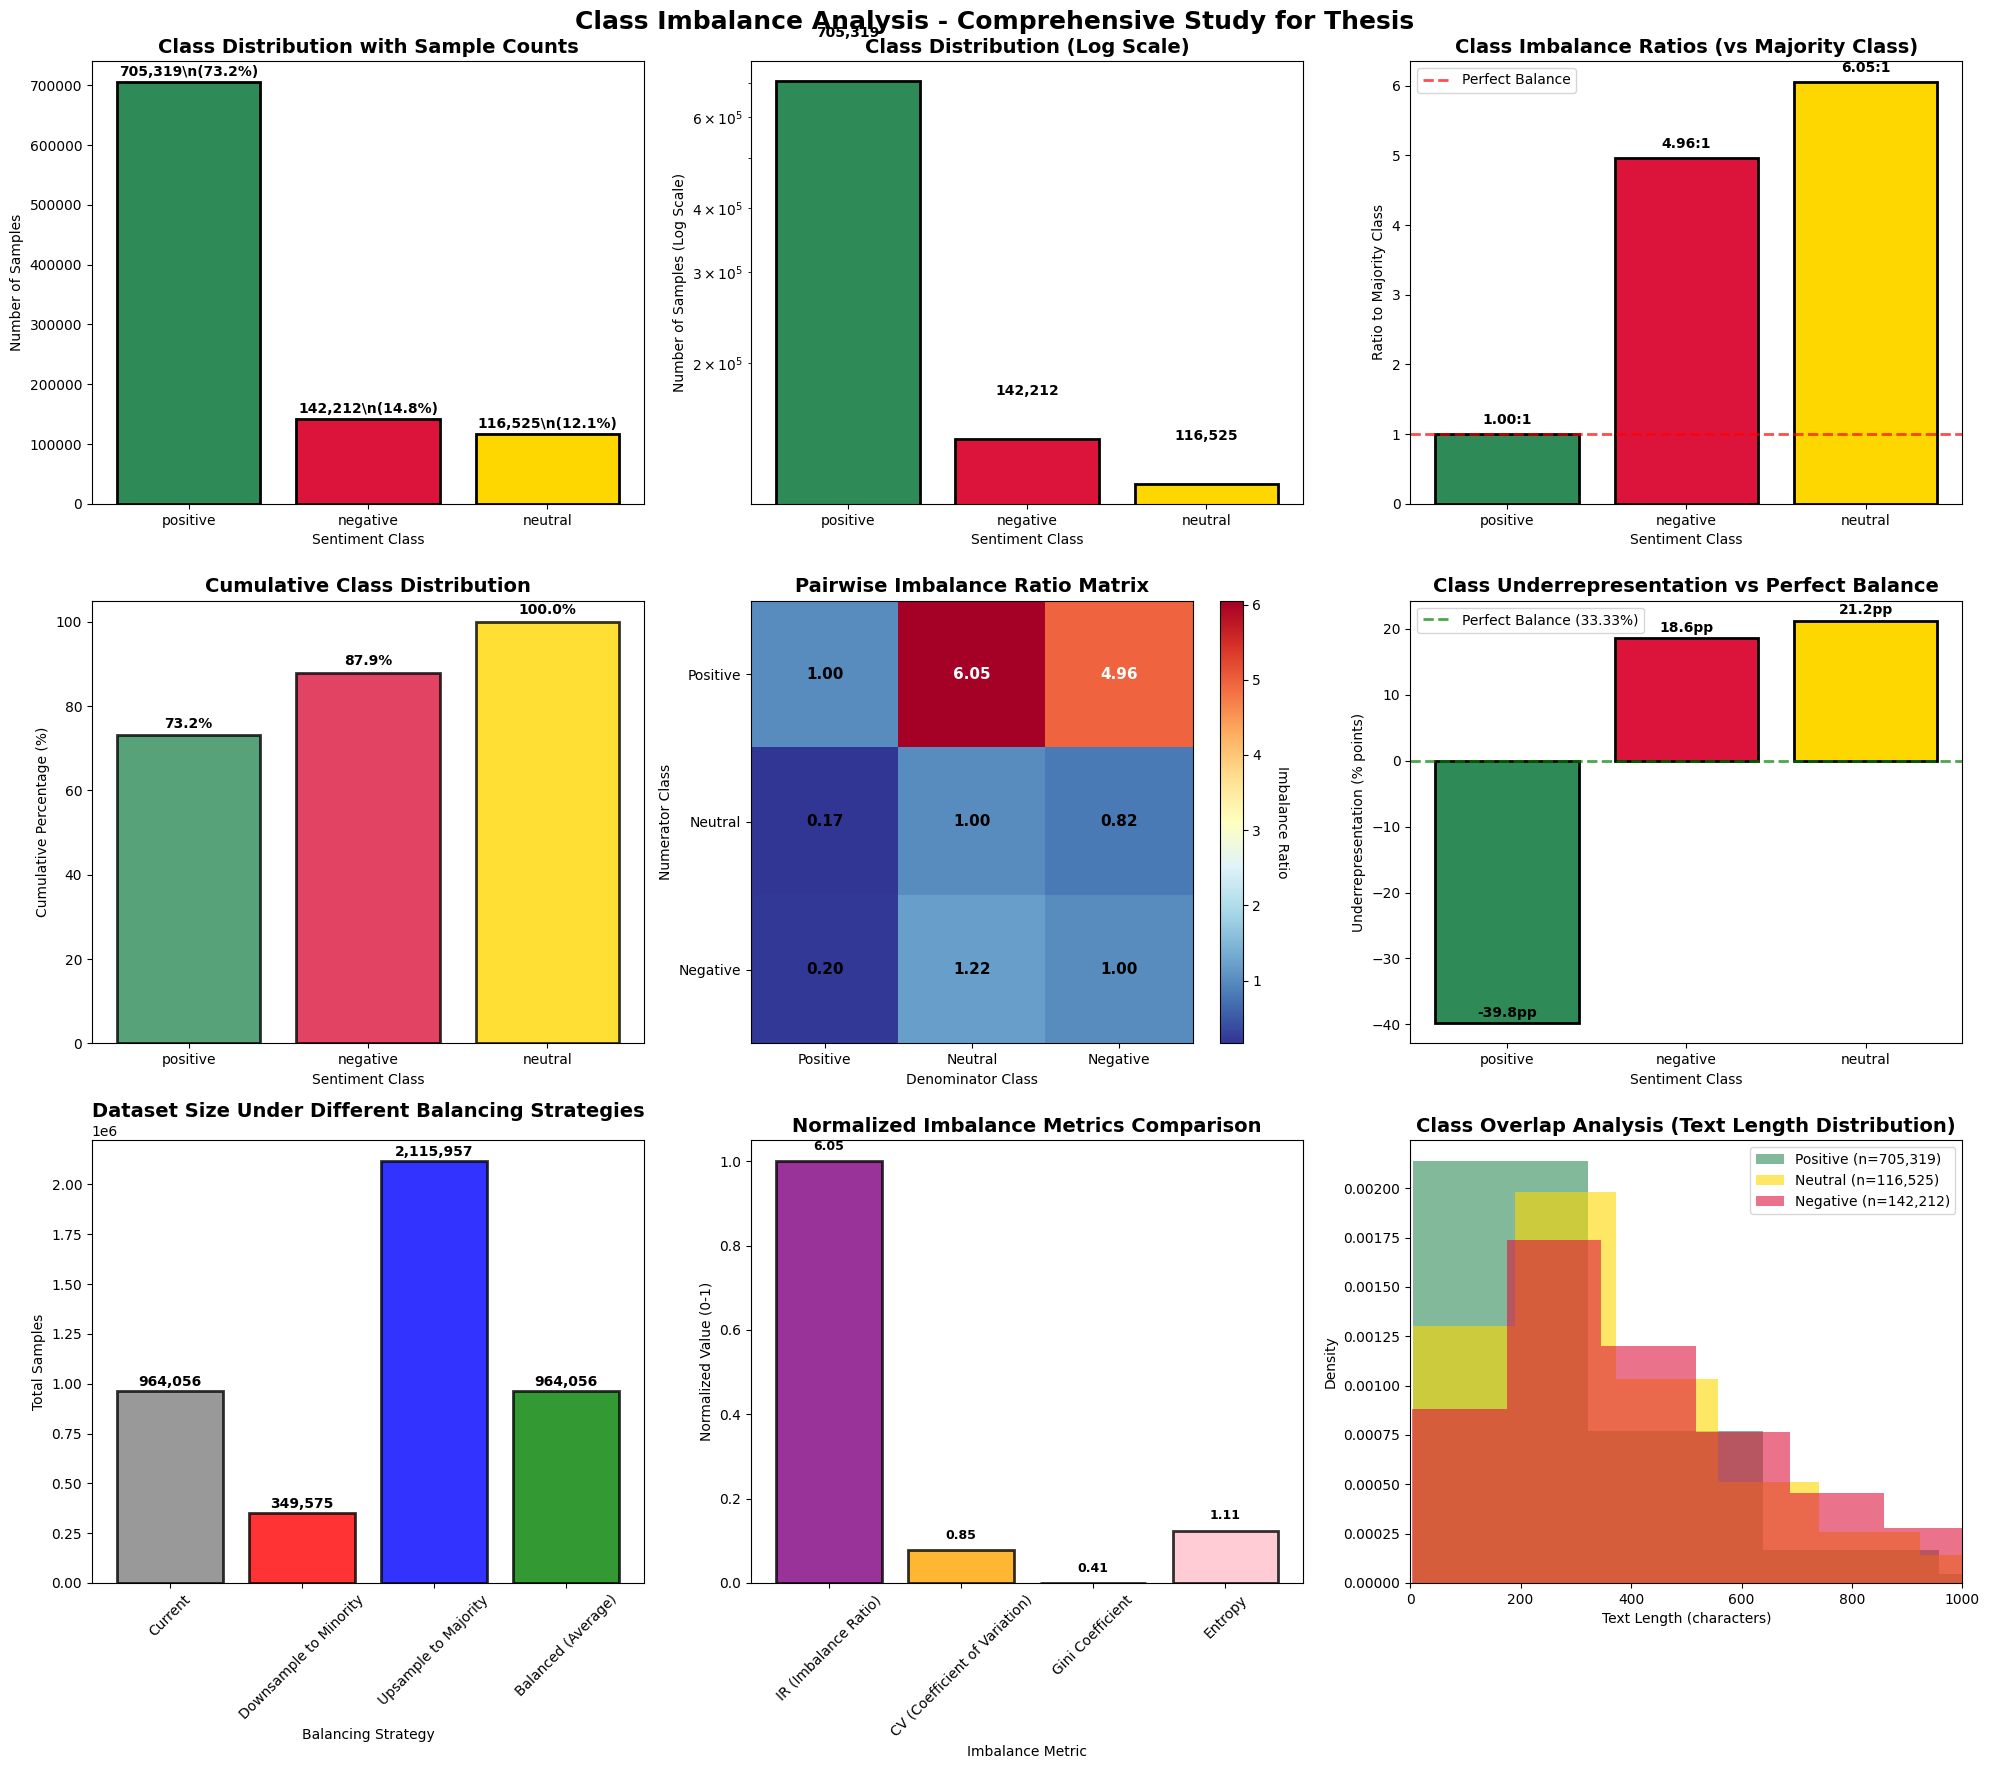

\nClass imbalance visualizations completed!


In [20]:
# ============================================================================
# COMPREHENSIVE CLASS IMBALANCE VISUALIZATIONS FOR THESIS
# ============================================================================

print("\\nCREATING COMPREHENSIVE CLASS IMBALANCE VISUALIZATIONS...")

fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('Class Imbalance Analysis - Comprehensive Study for Thesis', fontsize=18, fontweight='bold')

# Define colors for consistent visualization
colors = {'positive': '#2E8B57', 'neutral': '#FFD700', 'negative': '#DC143C'}
sentiment_colors = [colors[sent] for sent in sentiment_counts.index]

# 1. Class Distribution - Bar Chart with Imbalance Ratios
axes[0, 0].bar(sentiment_counts.index, sentiment_counts.values, color=sentiment_colors, edgecolor='black', linewidth=2)
axes[0, 0].set_title('Class Distribution with Sample Counts', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sentiment Class')
axes[0, 0].set_ylabel('Number of Samples')
for i, (sentiment, count) in enumerate(sentiment_counts.items()):
    axes[0, 0].text(i, count + 5000, f'{count:,}\\n({count/total_samples*100:.1f}%)', 
                   ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. Class Distribution - Logarithmic Scale
axes[0, 1].bar(sentiment_counts.index, sentiment_counts.values, color=sentiment_colors, edgecolor='black', linewidth=2)
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Class Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Sentiment Class')
axes[0, 1].set_ylabel('Number of Samples (Log Scale)')
for i, (sentiment, count) in enumerate(sentiment_counts.items()):
    axes[0, 1].text(i, count * 1.2, f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 3. Imbalance Ratio Visualization
imbalance_ratios = [sentiment_counts.iloc[0] / count for count in sentiment_counts.values]
axes[0, 2].bar(sentiment_counts.index, imbalance_ratios, color=sentiment_colors, edgecolor='black', linewidth=2)
axes[0, 2].set_title('Class Imbalance Ratios (vs Majority Class)', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Sentiment Class')
axes[0, 2].set_ylabel('Ratio to Majority Class')
axes[0, 2].axhline(y=1, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Perfect Balance')
for i, (sentiment, ratio) in enumerate(zip(sentiment_counts.index, imbalance_ratios)):
    axes[0, 2].text(i, ratio + 0.1, f'{ratio:.2f}:1', ha='center', va='bottom', fontweight='bold', fontsize=10)
axes[0, 2].legend()

# 4. Cumulative Distribution
cumulative_pct = np.cumsum(sentiment_counts.values) / total_samples * 100
axes[1, 0].bar(sentiment_counts.index, cumulative_pct, color=sentiment_colors, edgecolor='black', linewidth=2, alpha=0.8)
axes[1, 0].set_title('Cumulative Class Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sentiment Class')
axes[1, 0].set_ylabel('Cumulative Percentage (%)')
for i, (sentiment, cum_pct) in enumerate(zip(sentiment_counts.index, cumulative_pct)):
    axes[1, 0].text(i, cum_pct + 1, f'{cum_pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 5. Class Imbalance Severity Heatmap
imbalance_matrix = np.zeros((3, 3))
sentiment_list = ['positive', 'neutral', 'negative']
for i, sent1 in enumerate(sentiment_list):
    for j, sent2 in enumerate(sentiment_list):
        if sent1 in sentiment_counts.index and sent2 in sentiment_counts.index:
            imbalance_matrix[i, j] = sentiment_counts[sent1] / sentiment_counts[sent2]

im = axes[1, 1].imshow(imbalance_matrix, cmap='RdYlBu_r', aspect='auto')
axes[1, 1].set_title('Pairwise Imbalance Ratio Matrix', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(range(3))
axes[1, 1].set_yticks(range(3))
axes[1, 1].set_xticklabels(['Positive', 'Neutral', 'Negative'])
axes[1, 1].set_yticklabels(['Positive', 'Neutral', 'Negative'])
axes[1, 1].set_xlabel('Denominator Class')
axes[1, 1].set_ylabel('Numerator Class')

# Add text annotations to heatmap
for i in range(3):
    for j in range(3):
        text = axes[1, 1].text(j, i, f'{imbalance_matrix[i, j]:.2f}', 
                              ha='center', va='center', fontweight='bold', fontsize=11)
        if imbalance_matrix[i, j] > 3:  # High imbalance
            text.set_color('white')

# Add colorbar for heatmap
cbar = plt.colorbar(im, ax=axes[1, 1])
cbar.set_label('Imbalance Ratio', rotation=270, labelpad=20)

# 6. Minority Class Analysis
minority_analysis = pd.DataFrame({
    'Class': sentiment_counts.index,
    'Count': sentiment_counts.values,
    'Percentage': sentiment_counts.values / total_samples * 100,
    'Underrepresentation_vs_Balanced': 33.33 - (sentiment_counts.values / total_samples * 100)
})

axes[1, 2].bar(minority_analysis['Class'], minority_analysis['Underrepresentation_vs_Balanced'], 
               color=sentiment_colors, edgecolor='black', linewidth=2)
axes[1, 2].set_title('Class Underrepresentation vs Perfect Balance', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Sentiment Class')
axes[1, 2].set_ylabel('Underrepresentation (% points)')
axes[1, 2].axhline(y=0, color='green', linestyle='--', alpha=0.7, linewidth=2, label='Perfect Balance (33.33%)')
for i, (sentiment, under_rep) in enumerate(zip(minority_analysis['Class'], minority_analysis['Underrepresentation_vs_Balanced'])):
    axes[1, 2].text(i, under_rep + 0.5, f'{under_rep:.1f}pp', ha='center', va='bottom', fontweight='bold', fontsize=10)
axes[1, 2].legend()

# 7. Sample Efficiency Analysis
balancing_scenarios = {
    'Current': sentiment_counts.to_dict(),
    'Downsample to Minority': {sent: minority_count for sent in sentiment_counts.index},
    'Upsample to Majority': {sent: majority_count for sent in sentiment_counts.index},
    'Balanced (Average)': {sent: int(total_samples/3) for sent in sentiment_counts.index}
}

scenario_names = list(balancing_scenarios.keys())
scenario_totals = [sum(scenario.values()) for scenario in balancing_scenarios.values()]

axes[2, 0].bar(scenario_names, scenario_totals, color=['gray', 'red', 'blue', 'green'], 
               edgecolor='black', linewidth=2, alpha=0.8)
axes[2, 0].set_title('Dataset Size Under Different Balancing Strategies', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Balancing Strategy')
axes[2, 0].set_ylabel('Total Samples')
axes[2, 0].tick_params(axis='x', rotation=45)
for i, (scenario, total) in enumerate(zip(scenario_names, scenario_totals)):
    axes[2, 0].text(i, total + 10000, f'{total:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 8. Imbalance Metrics Comparison
imbalance_metrics = {
    'IR (Imbalance Ratio)': majority_count / minority_count,
    'CV (Coefficient of Variation)': np.std(sentiment_counts.values) / np.mean(sentiment_counts.values),
    'Gini Coefficient': 2 * np.sum([(i+1) * val for i, val in enumerate(sorted(sentiment_counts.values))]) / (len(sentiment_counts) * np.sum(sentiment_counts.values)) - (len(sentiment_counts) + 1) / len(sentiment_counts),
    'Entropy': -np.sum([(count/total_samples) * np.log2(count/total_samples) for count in sentiment_counts.values])
}

metric_names = list(imbalance_metrics.keys())
metric_values = list(imbalance_metrics.values())

# Normalize metrics to 0-1 scale for comparison
normalized_values = [(val - min(metric_values)) / (max(metric_values) - min(metric_values)) for val in metric_values]

axes[2, 1].bar(metric_names, normalized_values, color=['purple', 'orange', 'brown', 'pink'], 
               edgecolor='black', linewidth=2, alpha=0.8)
axes[2, 1].set_title('Normalized Imbalance Metrics Comparison', fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('Imbalance Metric')
axes[2, 1].set_ylabel('Normalized Value (0-1)')
axes[2, 1].tick_params(axis='x', rotation=45)
for i, (metric, norm_val, orig_val) in enumerate(zip(metric_names, normalized_values, metric_values)):
    axes[2, 1].text(i, norm_val + 0.02, f'{orig_val:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 9. Class Overlap Analysis (using text length as proxy)
for sentiment, color in colors.items():
    if sentiment in spanish_reviews['sentiment'].values:
        data = spanish_reviews[spanish_reviews['sentiment'] == sentiment]['text_length']
        axes[2, 2].hist(data, bins=50, alpha=0.6, color=color, label=f'{sentiment.capitalize()} (n={len(data):,})', density=True)

axes[2, 2].set_title('Class Overlap Analysis (Text Length Distribution)', fontsize=14, fontweight='bold')
axes[2, 2].set_xlabel('Text Length (characters)')
axes[2, 2].set_ylabel('Density')
axes[2, 2].legend()
axes[2, 2].set_xlim(0, 1000)  # Focus on main distribution

plt.tight_layout()
plt.show()

print("\\nClass imbalance visualizations completed!")

In [21]:
# Detailed sentiment statistics
print("DETAILED SENTIMENT ANALYSIS STATISTICS")
print("=" * 50)

for sentiment in ['negative', 'neutral', 'positive']:
    sentiment_data = spanish_reviews[spanish_reviews['sentiment'] == sentiment]
    print(f"\n{sentiment.upper()} REVIEWS:")
    print(f"  Count: {len(sentiment_data):,} ({len(sentiment_data)/len(spanish_reviews)*100:.1f}%)")
    print(f"  Text length - Mean: {sentiment_data['text_length'].mean():.1f}, Median: {sentiment_data['text_length'].median():.1f}")
    print(f"  Word count - Mean: {sentiment_data['word_count'].mean():.1f}, Median: {sentiment_data['word_count'].median():.1f}")
    print(f"  Rating distribution: {sentiment_data['rating'].value_counts().sort_index().to_dict()}")

# Overall statistics
print(f"\nOVERALL STATISTICS:")
print(f"  Total Spanish reviews: {len(spanish_reviews):,}")
print(f"  Class balance ratio (pos:neu:neg): {sentiment_counts['positive']:.0f}:{sentiment_counts['neutral']:.0f}:{sentiment_counts['negative']:.0f}")
print(f"  Most common sentiment: {sentiment_counts.index[0]} ({sentiment_counts.iloc[0]/len(spanish_reviews)*100:.1f}%)")
print(f"  Dataset imbalance: {'Yes' if sentiment_counts.max() / sentiment_counts.min() > 3 else 'No'} (ratio: {sentiment_counts.max() / sentiment_counts.min():.1f}:1)")

DETAILED SENTIMENT ANALYSIS STATISTICS

NEGATIVE REVIEWS:
  Count: 142,212 (14.8%)
  Text length - Mean: 503.1, Median: 383.0
  Word count - Mean: 90.2, Median: 69.0
  Rating distribution: {10: 86342, 20: 55870}

NEUTRAL REVIEWS:
  Count: 116,525 (12.1%)
  Text length - Mean: 409.4, Median: 310.0
  Word count - Mean: 72.4, Median: 55.0
  Rating distribution: {30: 116525}

POSITIVE REVIEWS:
  Count: 705,319 (73.2%)
  Text length - Mean: 310.6, Median: 234.0
  Word count - Mean: 53.2, Median: 40.0
  Rating distribution: {40: 263642, 50: 441677}

OVERALL STATISTICS:
  Total Spanish reviews: 964,056
  Class balance ratio (pos:neu:neg): 705319:116525:142212
  Most common sentiment: positive (73.2%)
  Dataset imbalance: Yes (ratio: 6.1:1)


In [22]:
# Text preprocessing for sentiment analysis
import string

def preprocess_text(text):
    """Basic text preprocessing for sentiment analysis"""
    # Convert to lowercase
    text = text.lower()
    # Remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+', '', text)
    # Remove extra whitespace and punctuation
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing
spanish_reviews['text_clean'] = spanish_reviews['text'].apply(preprocess_text)

print("Text preprocessing completed!")
print(f"\nExample of original vs cleaned text:")
sample_idx = 1000
print(f"Original: {spanish_reviews.iloc[sample_idx]['text'][:150]}...")
print(f"Cleaned:  {spanish_reviews.iloc[sample_idx]['text_clean'][:150]}...")

Text preprocessing completed!

Example of original vs cleaned text:
Original: Entramos por casualidad en Lambuzo cuando buscábamos un sitio para comer y nos encantó : el sitio es bonito, tranquilo, los camareros son muy simpátic...
Cleaned:  entramos por casualidad en lambuzo cuando buscábamos un sitio para comer y nos encantó el sitio es bonito tranquilo los camareros son muy simpáticos y...


In [23]:
# Sample texts for each sentiment class
print("SAMPLE TEXTS BY SENTIMENT CLASS")
print("=" * 50)

# Function to get random samples
def get_samples(sentiment, n=3, min_length=50):
    sentiment_data = spanish_reviews[
        (spanish_reviews['sentiment'] == sentiment) & 
        (spanish_reviews['text_length'] >= min_length)
    ]
    return sentiment_data.sample(n)[['text', 'rating', 'text_length']]

for sentiment in ['negative', 'neutral', 'positive']:
    print(f"\n{sentiment.upper()} SAMPLES:")
    print("-" * 30)
    samples = get_samples(sentiment, n=3)
    for i, (idx, row) in enumerate(samples.iterrows(), 1):
        print(f"\n{i}. Rating: {row['rating']}, Length: {row['text_length']} chars")
        print(f"   Text: {row['text'][:200]}{'...' if len(row['text']) > 200 else ''}")

SAMPLE TEXTS BY SENTIMENT CLASS

NEGATIVE SAMPLES:
------------------------------

1. Rating: 10, Length: 1251 chars
   Text: Buen producto, buena cocina, buen ambiente, pero pésimo servicio. Para empezar, hemos pedido recomendación a uno de los camareros sobre entrantes a compartir: no tenía ni idea, esa ha sido nuestra con...

2. Rating: 10, Length: 202 chars
   Text: Quisimos darle una oportunidad aún viendo los comentarios negativos y podría decir que NUNCA he tenido un camarero más borde. La comida está bien, bueno sin más. No merece la pena por el trato recibid...

3. Rating: 10, Length: 480 chars
   Text: Después de esperar una cola como si fuera la puerta de una discoteca (te ponen fuera con una barrera) los camareros te atienden a toda velocidad para que te vayas cuanto antes. Según te estás terminan...

NEUTRAL SAMPLES:
------------------------------

1. Rating: 30, Length: 455 chars
   Text: He ido por primera vez a probar este tipo de cocina y sali algo desencantada del lug

TOP WORDS BY SENTIMENT CLASS

NEGATIVE - Top 15 words:
  comida: 63,499
  nada: 41,379
  servicio: 41,144
  mesa: 35,709
  restaurante: 35,566
  porque: 34,743
  sitio: 34,435
  calidad: 31,895
  pedimos: 30,358
  mal: 29,977
  dos: 29,464
  precio: 29,275
  platos: 28,067
  comer: 26,294
  mucho: 25,131

NEUTRAL - Top 15 words:
  comida: 56,695
  precio: 38,295
  servicio: 36,835
  buena: 34,967
  poco: 31,112
  sitio: 29,881
  restaurante: 28,728
  calidad: 28,530
  platos: 28,308
  bastante: 25,216
  local: 24,503
  algo: 23,250
  nada: 22,829
  aunque: 20,273
  bueno: 19,259

POSITIVE - Top 15 words:
  comida: 305,847
  buena: 205,939
  calidad: 182,175
  servicio: 180,476
  precio: 170,592
  restaurante: 147,819
  sitio: 144,926
  platos: 141,549
  buen: 131,792
  madrid: 121,330
  excelente: 117,019
  atención: 110,372
  trato: 101,202
  local: 98,218
  lugar: 96,461


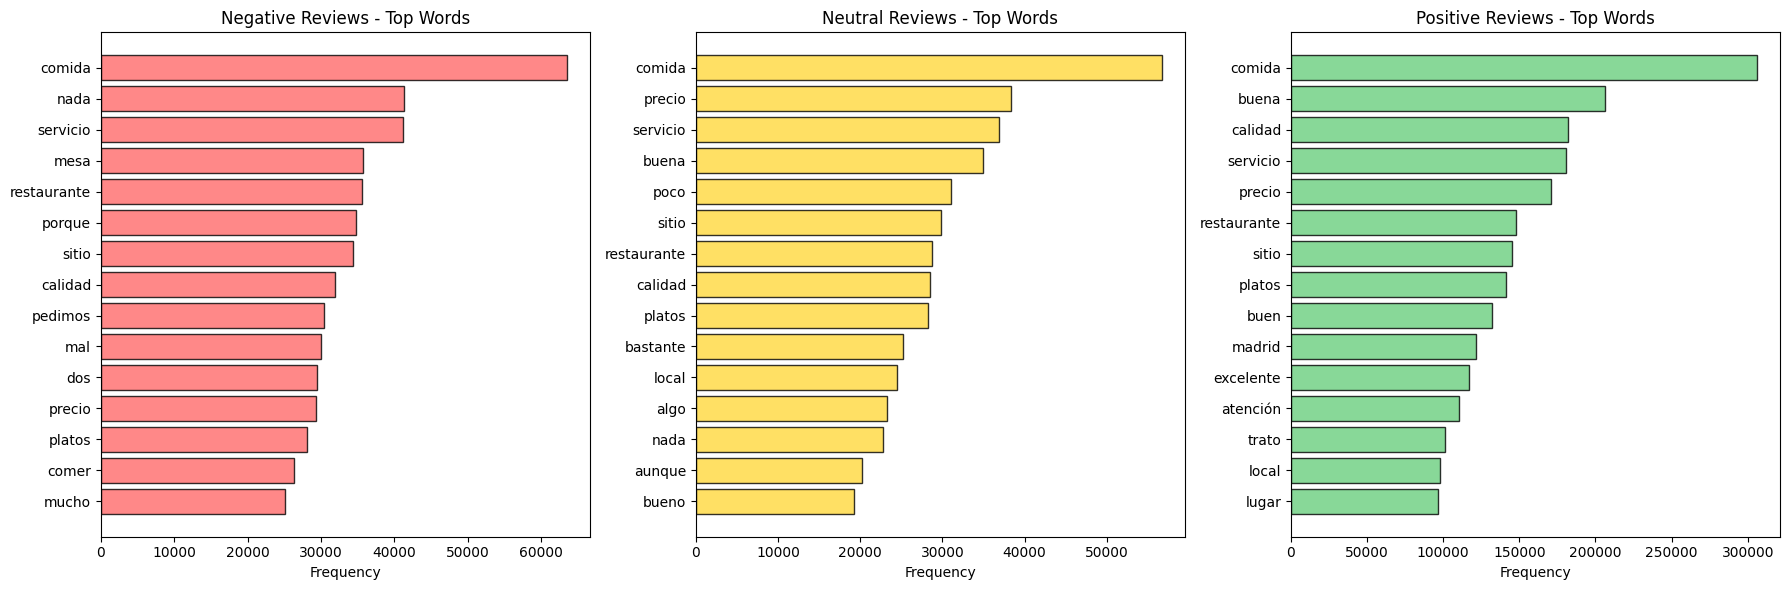

In [24]:
# Most common words by sentiment
from collections import Counter

# Spanish stop words
spanish_stopwords = {
    'el', 'la', 'de', 'que', 'y', 'a', 'en', 'un', 'es', 'se', 'no', 'te', 'lo', 'le', 'da', 'su', 
    'por', 'son', 'con', 'para', 'al', 'del', 'los', 'las', 'pero', 'me', 'si', 'muy', 'más', 'una', 
    'este', 'esta', 'han', 'todo', 'nos', 'yo', 'mi', 'tiene', 'bien', 'hace', 'desde', 'cada', 
    'hasta', 'sin', 'sobre', 'hacer', 'tanto', 'como', 'fue', 'ser', 'o', 'era', 'estar', 'he', 
    'había', 'sido', 'tiene', 'hay', 'pueden', 'puede', 'está', 'estaba', 'estoy', 'donde', 'cuando'
}

def get_top_words(sentiment, n=20):
    """Get top N words for a sentiment class"""
    sentiment_texts = spanish_reviews[spanish_reviews['sentiment'] == sentiment]['text_clean']
    all_words = ' '.join(sentiment_texts).split()
    filtered_words = [word for word in all_words if len(word) > 2 and word not in spanish_stopwords]
    return Counter(filtered_words).most_common(n)

# Analyze words by sentiment
print("TOP WORDS BY SENTIMENT CLASS")
print("=" * 50)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = ['#ff6b6b', '#ffd93d', '#6bcf7f']

for i, (sentiment, color) in enumerate(zip(['negative', 'neutral', 'positive'], colors)):
    top_words = get_top_words(sentiment, 15)
    words, counts = zip(*top_words)
    
    print(f"\n{sentiment.upper()} - Top 15 words:")
    for word, count in top_words:
        print(f"  {word}: {count:,}")
    
    # Visualize
    axes[i].barh(range(len(words)), counts, color=color, alpha=0.8, edgecolor='black')
    axes[i].set_yticks(range(len(words)))
    axes[i].set_yticklabels(words)
    axes[i].set_title(f'{sentiment.capitalize()} Reviews - Top Words')
    axes[i].set_xlabel('Frequency')
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()

In [25]:
# Save the prepared dataset for sentiment analysis
# Select relevant columns for modeling
sentiment_dataset = spanish_reviews[[
    'reviewId', 'text', 'text_clean', 'rating', 'sentiment', 
    'text_length', 'word_count', 'date'
]].copy()

# Save to CSV for easy access
output_file = f"{city}_spanish_reviews_sentiment.csv"
sentiment_dataset.to_csv(output_file, index=False)
print(f"Dataset saved to: {output_file}")
print(f"Saved dataset shape: {sentiment_dataset.shape}")

# Also save as pickle for faster loading
pickle_file = f"{city}_spanish_reviews_sentiment.pkl"
sentiment_dataset.to_pickle(pickle_file)
print(f"Dataset also saved as pickle: {pickle_file}")

print("\nFinal dataset summary:")
print(f"  Total reviews: {len(sentiment_dataset):,}")
print(f"  Sentiment distribution: {sentiment_dataset['sentiment'].value_counts().to_dict()}")
print(f"  Date range: {sentiment_dataset['date'].min()} to {sentiment_dataset['date'].max()}")
print(f"  Average text length: {sentiment_dataset['text_length'].mean():.1f} characters")
print(f"  Average word count: {sentiment_dataset['word_count'].mean():.1f} words")

Dataset saved to: Madrid_spanish_reviews_sentiment.csv
Saved dataset shape: (964056, 8)
Dataset also saved as pickle: Madrid_spanish_reviews_sentiment.pkl

Final dataset summary:
  Total reviews: 964,056
  Sentiment distribution: {'positive': 705319, 'negative': 142212, 'neutral': 116525}
  Date range: 2007-08-06 to 2023-06-10
  Average text length: 350.9 characters
  Average word count: 61.0 words


In [26]:
# Data preparation summary for machine learning
print("MACHINE LEARNING PREPARATION SUMMARY")
print("=" * 50)

print("\n1. DATASET CHARACTERISTICS:")
print(f"   - Total samples: {len(sentiment_dataset):,}")
print(f"   - Features: text, text_clean, text_length, word_count")
print(f"   - Target: sentiment (3 classes)")
print(f"   - Language: Spanish only")

print("\n2. CLASS DISTRIBUTION:")
for sentiment in ['negative', 'neutral', 'positive']:
    count = sentiment_dataset[sentiment_dataset['sentiment'] == sentiment].shape[0]
    pct = count / len(sentiment_dataset) * 100
    print(f"   - {sentiment.capitalize()}: {count:,} ({pct:.1f}%)")

print("\n3. TEXT CHARACTERISTICS:")
print(f"   - Min text length: {sentiment_dataset['text_length'].min()} chars")
print(f"   - Max text length: {sentiment_dataset['text_length'].max()} chars")
print(f"   - Median text length: {sentiment_dataset['text_length'].median():.0f} chars")
print(f"   - Min word count: {sentiment_dataset['word_count'].min()} words")
print(f"   - Max word count: {sentiment_dataset['word_count'].max()} words")
print(f"   - Median word count: {sentiment_dataset['word_count'].median():.0f} words")

print("\n4. RECOMMENDATIONS FOR MODELING:")
print("   - Use 'text_clean' column for text-based models")
print("   - Consider handling class imbalance if severe")
print("   - Text length varies significantly - consider truncation/padding")
print("   - Rich Spanish vocabulary available for feature extraction")
print("   - Temporal information available for time-based analysis")

print(f"\n5. FILES CREATED:")
print(f"   - {output_file} (CSV format)")
print(f"   - {pickle_file} (Pickle format)")

print("\nDataset is ready for sentiment analysis model training!")

MACHINE LEARNING PREPARATION SUMMARY

1. DATASET CHARACTERISTICS:
   - Total samples: 964,056
   - Features: text, text_clean, text_length, word_count
   - Target: sentiment (3 classes)
   - Language: Spanish only

2. CLASS DISTRIBUTION:
   - Negative: 142,212 (14.8%)
   - Neutral: 116,525 (12.1%)
   - Positive: 705,319 (73.2%)

3. TEXT CHARACTERISTICS:
   - Min text length: 4 chars
   - Max text length: 15874 chars
   - Median text length: 258 chars
   - Min word count: 1 words
   - Max word count: 2538 words
   - Median word count: 44 words

4. RECOMMENDATIONS FOR MODELING:
   - Use 'text_clean' column for text-based models
   - Consider handling class imbalance if severe
   - Text length varies significantly - consider truncation/padding
   - Rich Spanish vocabulary available for feature extraction
   - Temporal information available for time-based analysis

5. FILES CREATED:
   - Madrid_spanish_reviews_sentiment.csv (CSV format)
   - Madrid_spanish_reviews_sentiment.pkl (Pickle for